In [33]:
import pandas as pd # voor dataprocessing, importeren csv file etc.
from sklearn.model_selection import train_test_split # voor het splitsen van train en testdata
from sklearn.preprocessing import StandardScaler
# de Decision Tree Regressor en optie om classifier om te zetten in dot_data:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import metrics # om het model te evalueren
import numpy as np # voor het berekenen van squared
from sklearn.externals.six import StringIO # wordt gebruikt om een tijdelijke, virtuele file aan te maken
import pydotplus # voor het omzetten van de data uit een dot file in een graph
from IPython.display import Image # om de gegenereerde png file van de tree in jupyter te tonen

In [3]:
# Importeren dataset en printen van aantal rijen/kolommen en de eerste 5 records
petrol = pd.read_csv("petrol_consumption.csv")
print(petrol.shape)
print('\n')
print(petrol.head())

(48, 5)


   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  


In [4]:
# Printen van verdere info zoals gemiddelde en std. deviatie
print(petrol.describe())

       Petrol_tax  Average_income  Paved_Highways  \
count   48.000000       48.000000       48.000000   
mean     7.668333     4241.833333     5565.416667   
std      0.950770      573.623768     3491.507166   
min      5.000000     3063.000000      431.000000   
25%      7.000000     3739.000000     3110.250000   
50%      7.500000     4298.000000     4735.500000   
75%      8.125000     4578.750000     7156.000000   
max     10.000000     5342.000000    17782.000000   

       Population_Driver_licence(%)  Petrol_Consumption  
count                     48.000000           48.000000  
mean                       0.570333          576.770833  
std                        0.055470          111.885816  
min                        0.451000          344.000000  
25%                        0.529750          509.500000  
50%                        0.564500          568.500000  
75%                        0.595250          632.750000  
max                        0.724000          968.000000  


In [6]:
# Splitsen data in labels en attributen 
X = petrol.drop('Petrol_Consumption', axis=1)
y = petrol['Petrol_Consumption']

In [20]:
# Verdelen data in trainset/testset en tonen rijen/kolommen van iedere set en eerste 5 records van trainset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
X_train.head()

(33, 4)
(15, 4)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
2,9.0,3865,1586,0.580
46,7.0,4296,4083,0.623
18,7.0,4716,5915,0.724
15,7.0,4318,10340,0.586
28,8.0,4188,5975,0.563


In [34]:
# Scalen van de data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Definiëren van het Regression Tree model en het fitten van de data
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [36]:
# De predictie van de petrol usage per sample in de testset volgens de getrainde regressor
y_pred = regressor.predict(X_test)
print(y_pred)

[547. 414. 699. 699. 699. 603. 699. 540. 414. 510. 464. 699. 699. 603.
 649.]


In [37]:
# Vergelijk met de daadwerkelijke waarden
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
29,534,547.0
4,410,414.0
26,577,699.0
30,571,699.0
32,577,699.0
37,704,603.0
34,487,699.0
40,587,540.0
7,467,414.0
10,580,510.0


In [38]:
# Evalueren van het regressormodel
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
metrics.r2_score(y_test, y_pred) # R-squared

Mean Absolute Error: 83.2
Mean Squared Error: 10261.6
Root Mean Squared Error: 101.29955577395194


-0.9734925671147827

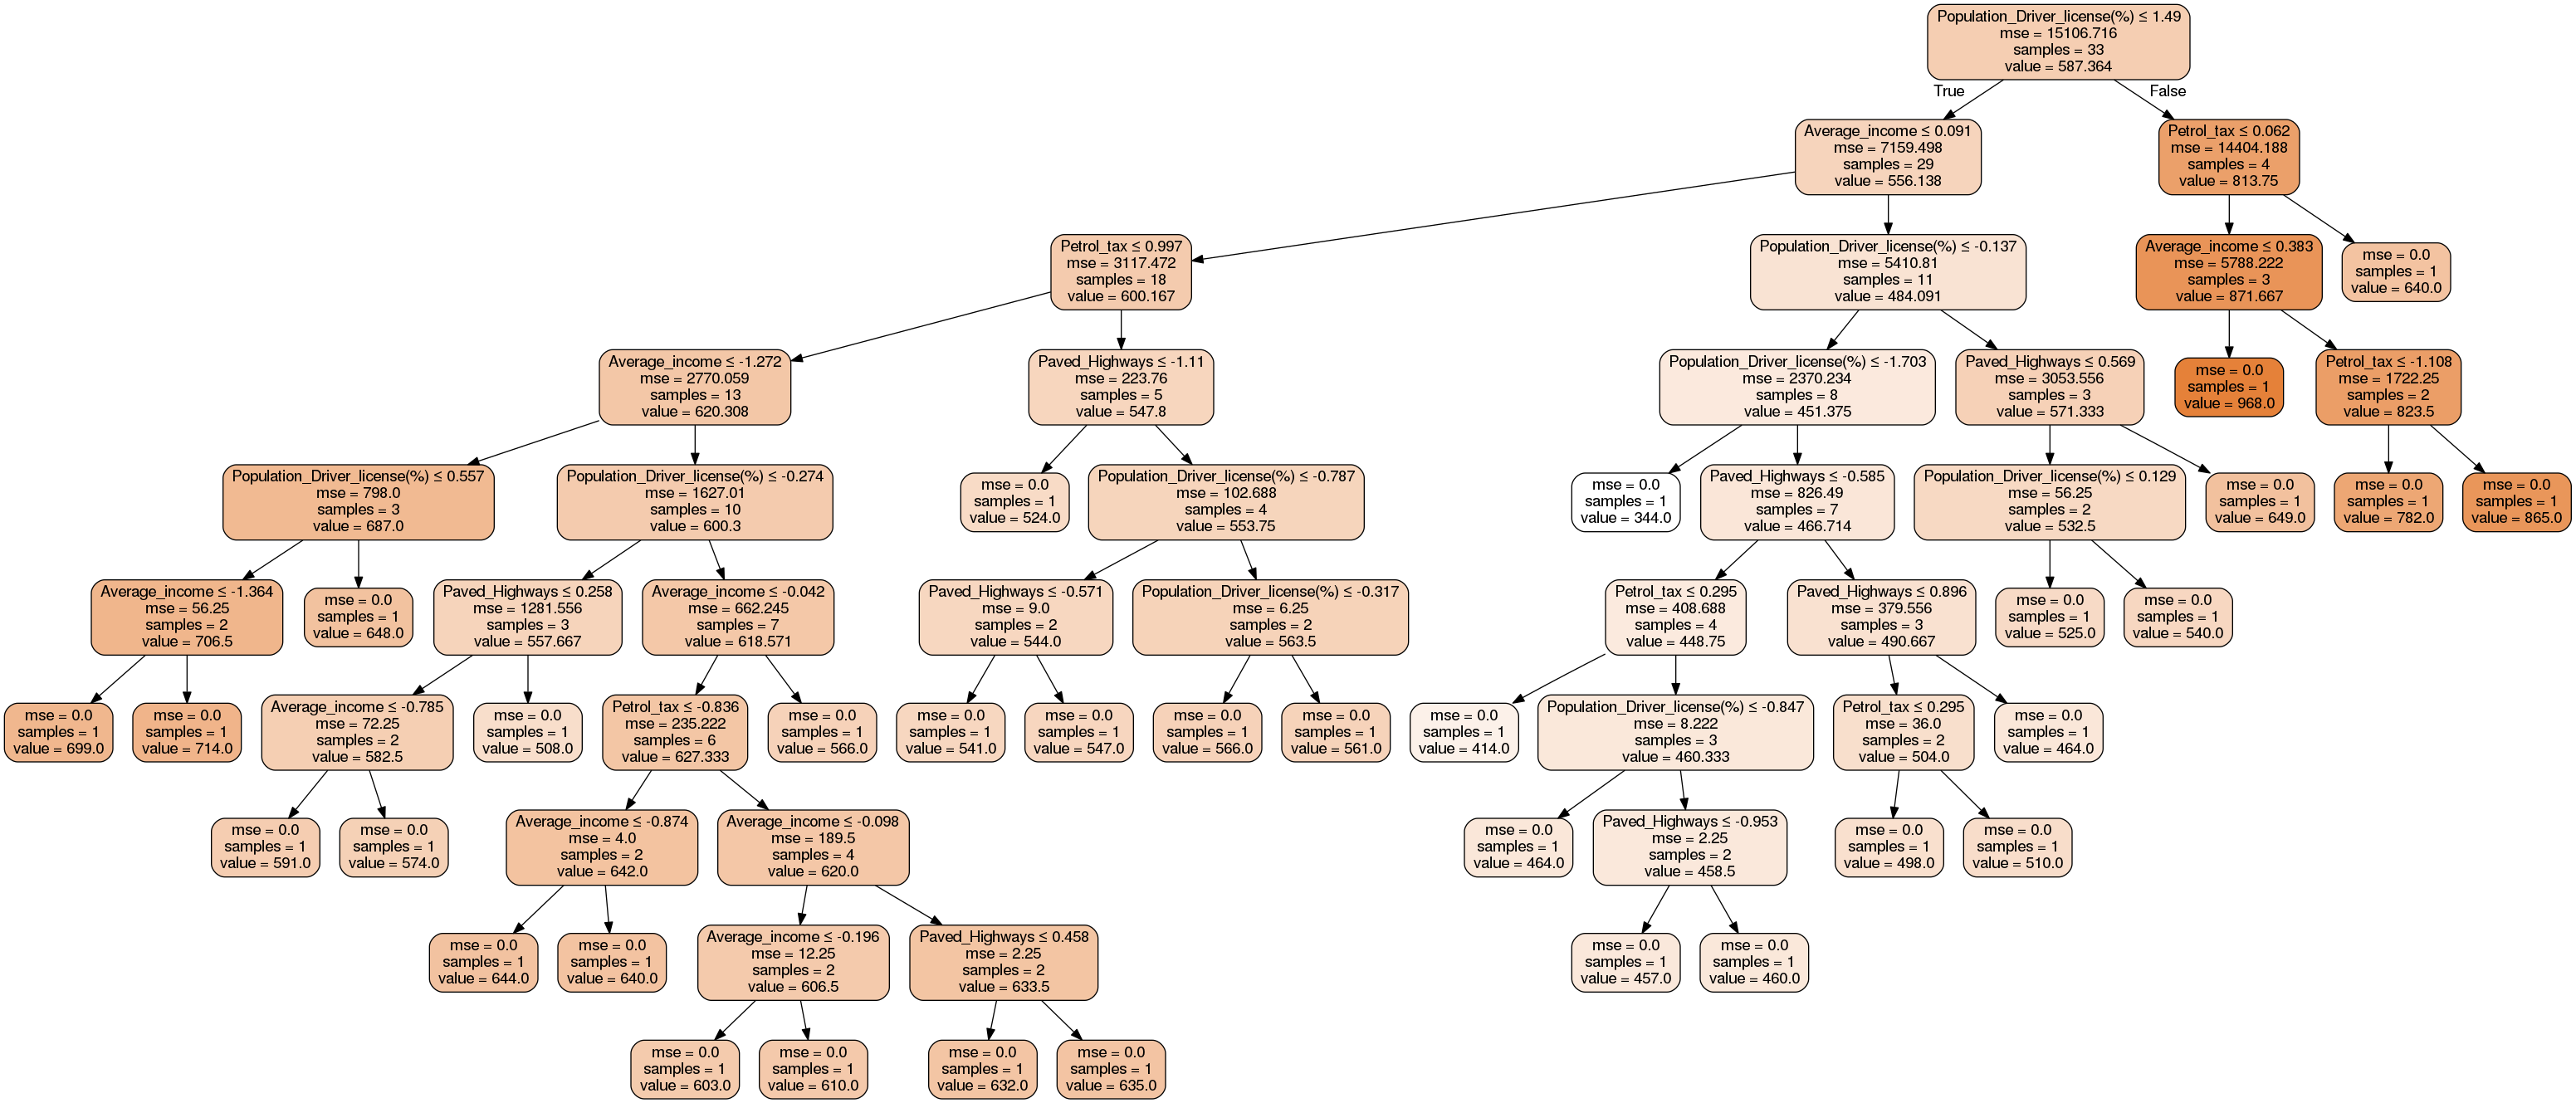

In [39]:
# Met StringIO wordt een tijdelijke file aangemaakt. De regressor wordt met behulp van export_graphviz omgezet in
# dot data (DOT is een taal om graphs mee te beschrijven). De dot data wordt met behulp van pydotplus omgezet in een
# graph. Deze wordt opgeslagen als PNG en in Jupyter getoond.
col_names = ['Petrol_tax','Average_income','Paved_Highways','Population_Driver_license(%)']
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True, feature_names = col_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('petrol_regression_tree.png')
Image(graph.create_png())